In [1]:
cd /home/jovyan

/home/jovyan


In [2]:
from lib.database import query_database, query_to_dataframe 

In [3]:
adult_df = query_to_dataframe("SELECT * FROM adult;")

In [4]:
adult_df.dtypes

age                int64
capital_gain       int64
capital_loss       int64
education         object
education_num      int64
fnlwgt             int64
gender            object
hours_per_week     int64
income_label      object
marital_status    object
native_country    object
occupation        object
race              object
relationship      object
workclass         object
dtype: object

In [5]:
from IPython.display import display

categorical_features = adult_df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    display(query_to_dataframe(f"SELECT DISTINCT({col}) FROM adult"))

,education
0,Prof-school
1,Doctorate
2,Bachelors
3,Preschool
4,12th
5,Masters
6,11th
7,9th
8,7th-8th
9,Some-college


,gender
0,Female
1,Male


,income_label
0,<=50K
1,>50K


,marital_status
0,Separated
1,Married-civ-spouse
2,Married-AF-spouse
3,Married-spouse-absent
4,Never-married
5,Widowed
6,Divorced


,native_country
0,Germany
1,Scotland
2,Thailand
3,Outlying-US(Guam-USVI-etc)
4,France
5,Guatemala
6,Portugal
7,Greece
8,Puerto-Rico
9,Poland


,occupation
0,Tech-support
1,Exec-managerial
2,Machine-op-inspct
3,Prof-specialty
4,Priv-house-serv
5,Sales
6,?
7,Transport-moving
8,Armed-Forces
9,Adm-clerical


,race
0,Other
1,Amer-Indian-Eskimo
2,White
3,Black
4,Asian-Pac-Islander


,relationship
0,Husband
1,Not-in-family
2,Other-relative
3,Own-child
4,Unmarried
5,Wife


,workclass
0,Federal-gov
1,Private
2,Without-pay
3,Local-gov
4,Never-worked
5,Self-emp-not-inc
6,Self-emp-inc
7,?
8,State-gov


In [6]:
print(query_database(f"SELECT COUNT(*) FROM adult"))
for col in categorical_features.columns:
    print(col, query_database(f"SELECT COUNT({col}) FROM adult WHERE {col} = ' ?'"))

[{'count': 32561}]
education [{'count': 0}]
gender [{'count': 0}]
income_label [{'count': 0}]
marital_status [{'count': 0}]
native_country [{'count': 583}]
occupation [{'count': 1843}]
race [{'count': 0}]
relationship [{'count': 0}]
workclass [{'count': 1836}]


In [7]:
categorical_features = adult_df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    print(col, sum(categorical_features[col] == ' ?'))
    print()

education 0

gender 0

income_label 0

marital_status 0

native_country 583

occupation 1843

race 0

relationship 0

workclass 1836



In [8]:
columns_with_null_values = ["native_country", "occupation", "workclass"]

In [9]:
for col in columns_with_null_values:
    display(query_to_dataframe(f"""
        SELECT {col}, COUNT(*) FROM adult GROUP BY {col} ORDER BY count DESC;
    """))

,count,native_country
0,29170,United-States
1,643,Mexico
2,583,?
3,198,Philippines
4,137,Germany
5,121,Canada
6,114,Puerto-Rico
7,106,El-Salvador
8,100,India
9,95,Cuba


,count,occupation
0,4140,Prof-specialty
1,4099,Craft-repair
2,4066,Exec-managerial
3,3770,Adm-clerical
4,3650,Sales
5,3295,Other-service
6,2002,Machine-op-inspct
7,1843,?
8,1597,Transport-moving
9,1370,Handlers-cleaners


,count,workclass
0,22696,Private
1,2541,Self-emp-not-inc
2,2093,Local-gov
3,1836,?
4,1298,State-gov
5,1116,Self-emp-inc
6,960,Federal-gov
7,14,Without-pay
8,7,Never-worked


In [10]:
query_to_dataframe("""
    SELECT COUNT(*) FROM adult WHERE (
        (native_country = ' ?') OR
        (occupation = ' ?') OR
        (workclass = ' ?')
    )
""")

,count
0,2399


In [11]:
%matplotlib inline

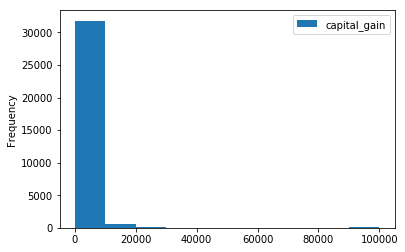

In [12]:
query_to_dataframe("SELECT capital_gain FROM adult").plot(kind="hist")

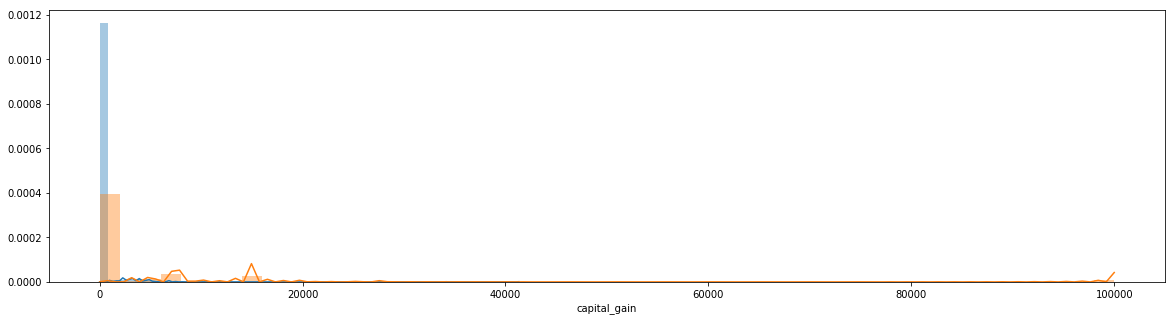

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
cap_gain = query_to_dataframe("SELECT capital_gain, income_label FROM adult")
for label in cap_gain.income_label.unique():
    sns.distplot(cap_gain[cap_gain.income_label == label].capital_gain)

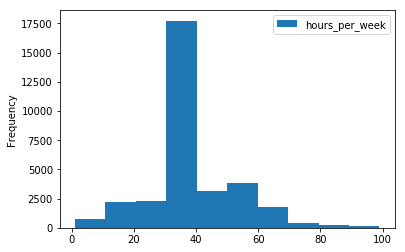

In [14]:
query_to_dataframe("SELECT hours_per_week FROM adult").plot(kind="hist")